<a href="https://colab.research.google.com/github/chu-ise/413A-2022/blob/main/notebooks/02/02-descriptive_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown
import os
id = "13mnxeW8lnMwajQHt88dXvnc8ONOJHEIK"

data_file = "data.zip"
gdown.download(id=id, output=data_file, quiet=False)
!unzip $data_file

Downloading...
From: https://drive.google.com/uc?id=13mnxeW8lnMwajQHt88dXvnc8ONOJHEIK
To: /content/data.zip
100%|██████████| 455k/455k [00:00<00:00, 35.3MB/s]

Archive:  data.zip
   creating: data/
  inflating: data/adult.data         
  inflating: data/SOCR_MLB.tsv       
  inflating: data/global_warming.csv  
  inflating: data/test_data.csv      


# Introduction to Descriptive Statistics

- variable types 
- descriptive statistics in python (min, max, mean, median, std, var, histograms, quantiles) 
- simple plotting functions 
- correlation vs causation
- confounding variables 
- descriptive vs. inferential statistics
- discrete and continuous random variables (e.g.: Bernoulli, Binomial, Normal)

In [2]:
# First import python packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#So that graphs are included in the notebook
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Alta monthly average snowfall, October - April

Let's compute descriptive statistics for the monthly average snowfall at Alta. 

The snowfall data was collected from 1980 to 2014 and is available [here](https://www.alta.com/conditions/weather-observations/snowfall-history).

In [3]:
Alta_avg_month_snow = [28.50,76.77,92.00,95.40,90.85,99.66,80.00]
months = ['Oct','Nov','Dec','Jan','Feb','March','Apr']

# Alta_avg_month_snow is a list of floats
print(type(Alta_avg_month_snow))
print(type(Alta_avg_month_snow[0]))

# months is a list of strings
print(type(months))
print(type(months[0]))

<class 'list'>
<class 'float'>
<class 'list'>
<class 'str'>


In [4]:
# how many months of data do we have?
len(Alta_avg_month_snow)

7

In [5]:
# compute the min and max snowfall
print(np.min(Alta_avg_month_snow))
print(np.max(Alta_avg_month_snow))

28.5
99.66


In [6]:
# what month do these correspond to? 
imin = np.argmin(Alta_avg_month_snow)
print(imin)
print(months[imin])
print(Alta_avg_month_snow[imin])

imax = np.argmax(Alta_avg_month_snow)
print(months[imax])
print(Alta_avg_month_snow[imax])


0
Oct
28.5
March
99.66


In [7]:
# compute the mean
mean_snow = np.mean(Alta_avg_month_snow)
print(mean_snow)

80.4542857142857


In [8]:
# compute the median
median_snow = np.median(Alta_avg_month_snow)
print(median_snow)

90.85


## Plotting quantitative data

We can use the python library [matplotlib](https://matplotlib.org/) to make a simple plot of the average monthly snowfall. After all, a picture is worth a thousand words. 



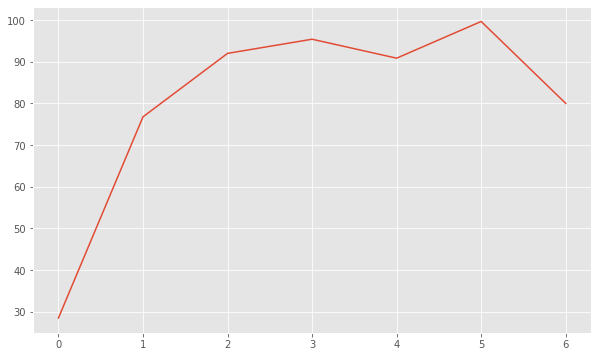

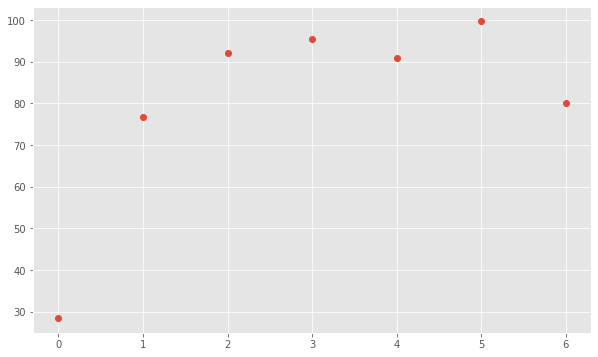

In [9]:
plt.plot(np.arange(7), Alta_avg_month_snow) #Note: plot(y) uses x as 0..N-1; plot(x,y) plots x versus y
#print(np.arange(7))
#plt.xticks(np.arange(7),months)
#plt.plot([0,6],[mean_snow,mean_snow], label="mean avg. monthly snowfall")
#plt.plot([0,6],[median_snow,median_snow], label="median avg. monthly snowfall")
#plt.title("Alta average monthly snowfall")
#plt.xlabel("month")
#plt.ylabel("snowfall (inches)")
#plt.legend(loc='lower right')
plt.show() #Display all previous plots in one figure
plt.plot(np.arange(7), Alta_avg_month_snow,'o')
plt.show() 

## Population data from the 1994 census

Let's compute some descriptive statistics for age in the 1994 census. We'll use the 'Census Income' dataset available [here](https://archive.ics.uci.edu/ml/datasets/Adult).

In [10]:
# use pandas to import a table of data from a website
data = pd.read_table("data/adult.data", sep=",", 
                  names=("age", "type_employer", "fnlwgt", "education", "education_num", "marital", 
                         "occupation", "relationship", "race","sex","capital_gain", "capital_loss", 
                         "hr_per_week","country", "income"))
print(type(data))


<class 'pandas.core.frame.DataFrame'>


In [11]:
print(data)

       age      type_employer  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

                   marital          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [12]:
# export a list containing ages of people in 1994 Census
ages = data["age"].tolist()
print(ages[:10])

[39, 50, 38, 53, 28, 37, 49, 52, 31, 42]


In [13]:
# now use numpy to compute descriptive statistics for ages
print(len(ages))
print(np.min(ages))
print(np.max(ages))
print(np.mean(ages))
print(np.median(ages))

32561
17
90
38.58164675532078
37.0


## Histograms

We can also make a histogram using the python library [matplotlib](https://matplotlib.org/) to show the distribution of ages in the dataset. 

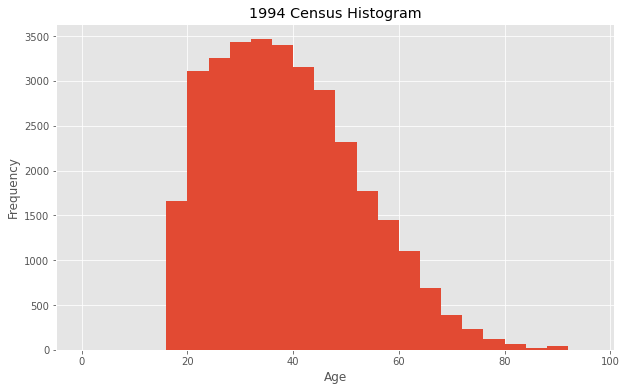

In [14]:
plt.hist(ages,np.arange(0,100,4)) # Use bins defined by np.arange(0,100,4)
#plt.hist(ages) # Use 20 bins
plt.title("1994 Census Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Quantiles 
Quantiles describe what percentage of the observations in a sample have smaller value


In [15]:
print(np.percentile(ages,25))
print(np.percentile(ages,75))

28.0
48.0


For this data, 25% of the people are under 28 years old

The middle 50% of the data (the data between the 25% and 75% quantiles) is between 28 and 48 years old 

**Question**: how do I read off quantiles from a histogram? 

# Variance and Standard Deviation

Variance and standard deviation quantify the amount of variation or dispersion of a set of data values.

Mean, $\mu = \frac{1}{n} \sum_{i = 1}^n x_i$ <br>
Variance $= \sigma^2   = \frac{1}{n} \sum_{i = 1}^n (x_i - \mu)^2$ <br>
Std. dev. $= \sigma$


In [16]:
print(np.var(ages))
print(np.std(ages))

186.05568600783081
13.640223092304275


## Covariance and Correlation
Covariance and correlation measure of how much two variables change together.

The *covariance* of two variables $x$ and $y$ is given by
$$
cov(x,y) = \frac{1}{n} \sum_{i=1}^n (x_i - \mu_x)(y_i - \mu_y),
$$ 
where
+ $\mu_x$ is mean of $x_1,x_2,\ldots,x_n$ and
+ $\mu_y$ is mean of $y_1,y_2,\ldots,y_n$.

The *correlation coefficient* of two variables $x$ and $y$ is given by 
$$
corr(x,y) = \frac{cov(x,y)}{\sigma_x \sigma_y},
$$
where
+ $\sigma_x$ is std. dev. of $x_1,x_2,\ldots,x_n$ and 
+ $\sigma_y$ is std. dev. of $y_1,y_2,\ldots,y_n$.

In 1994 consensus data, let's use numpy to find the correlation between age and hr_per_week

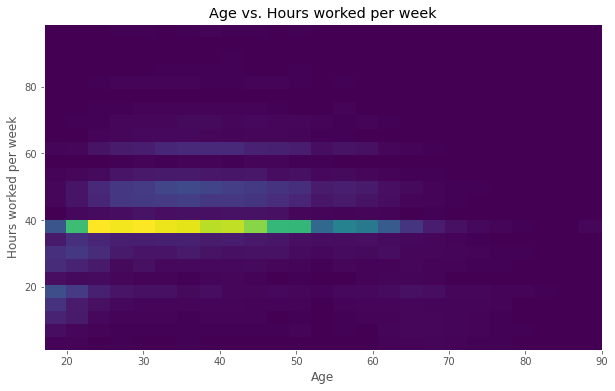

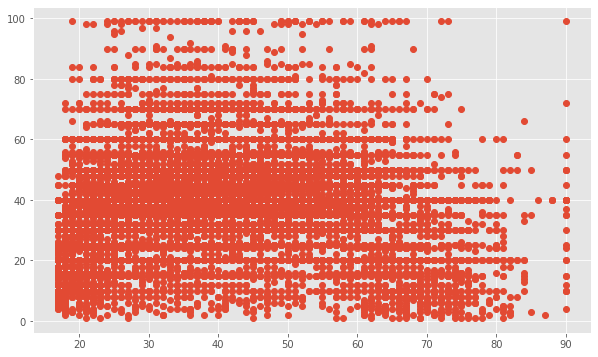

In [17]:
hr = data["hr_per_week"].tolist()

plt.hist2d(ages,hr,bins=25)
plt.title("Age vs. Hours worked per week")
plt.xlabel("Age")
plt.ylabel("Hours worked per week")
plt.show()
plt.plot(ages,hr,'o')
plt.show()

In [18]:
np.corrcoef(ages,hr)

array([[1.        , 0.06875571],
       [0.06875571, 1.        ]])

## Bernoulli Distribution

The Bernoulli distribution, named after Jacob Bernoulli, is the probability distribution of a random variable which takes the value 1 (success) with probability $p$ and the value 0 (failure) with probability $q=1-p$. 

The Bernoulli distribution with $p=0.5$ (implying $q=0.5$) describes a 'fair' coin toss where 1 and 0  represent "heads" and "tails", respectively. If the coin is unfair, then we would have that $p\neq 0.5$.

We can use python to sample from the Bernoulli probability distribution. 

In [19]:
import scipy as sc
from scipy.stats import bernoulli, binom, norm

In [20]:
n = 1000;
coin_flips = bernoulli.rvs(p=0.5, size=n)
print(coin_flips)

[0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0
 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0
 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1
 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1
 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0
 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1
 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0
 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1
 0 1 1 0 1 0 1 0 1 1 0 1 

How many heads did we get? We just count the number of 1's. 

In [21]:
print(sum(coin_flips))
print(sum(coin_flips)/n)

469
0.469


What if we flip the coin more times? 

In [22]:
n = 1000000
coin_flips = bernoulli.rvs(p=0.5, size=n)
print(sum(coin_flips)/n)

0.49969


Some facts about Bernoulli variables: 
* mean is p
* variance is p(1-p)

## Binomial distribution

The binomial distribution, with parameters $n$ and $p$, is a discrete probability distribution describing the total number of "successes" in $n$ Bernoulli random variables. For simplicity, take $p=0.5$ so that the Bernoulli distribution describes the outcome of a coin. For each flip, the probability of heads is $p$ (so the probability of tails is $q=1-p$). But we don't keep track of the individual flips. We only keep track of how many heads/tails there were in total. So, the binomial distribution can be thought of as summarizing a bunch of (independent) Bernoulli random variables. 

The following code is equivalent to flipping a fair (p=0.5) coin n=10 times and counting the number of heads and then repeating this process 1,000,000 times. 

In [23]:
p = 0.5
n = 10
bin_vars = binom.rvs(n=n,p=p,size=1000000)
print(bin_vars[:100])

[7 3 6 5 8 4 6 6 5 4 4 6 5 5 4 3 6 5 7 5 6 6 4 4 6 4 4 5 4 3 4 7 3 3 6 4 9
 6 7 3 7 5 6 4 3 3 5 5 5 5 4 6 5 4 6 6 6 5 3 8 4 3 7 4 4 7 6 7 8 5 6 5 6 4
 6 7 8 4 5 5 6 8 7 4 4 7 4 5 6 5 5 4 7 4 7 4 7 6 4 5]


[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5]


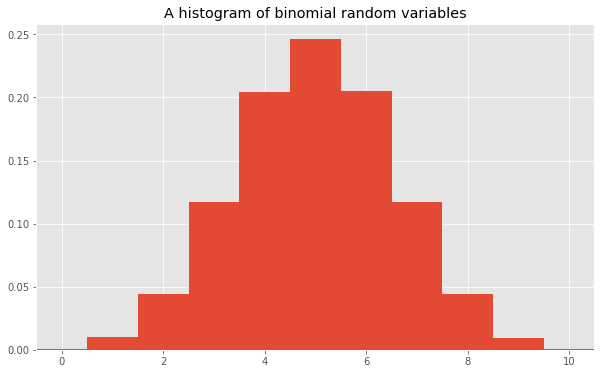

In [24]:
bins=np.arange(12)-.5
print(bins)
plt.hist(bin_vars, bins=bins,density=True)
plt.title("A histogram of binomial random variables")
plt.xlim([-.5,10.5])
plt.show()

Some facts about the binomial distribution: 
* The mean is $np$
* The variance is $np(1-p)$

## Discrete random variables and probability mass functions 

The Binomial and Bernoulli random variables are examples of *discrete random variables* since they can take only discrete values. A Bernoulli random variable can take values $0$ or $1$. A binomial random variable  can only take values 
$$
0,1,\ldots, n. 
$$
One can compute the probability that the variable takes each value. This is called the *probability mass function*. 
For a Bernoulli random variable, the probability mass function is given by 
$$
f(k) = \begin{cases} p & k=1 \\ 1-p & k = 0 \end{cases}
$$
For a binomial random variable, the probability mass function is given by 
$$
f(k) = \binom{n}{k} p^k (1-p)^{n-k}.
$$
Here, $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ is the number of ways to arrange the
$k$ heads among the $n$ flips. For a fair coin, we have $p=0.5$ and $f(k) = \binom{n}{k} \frac{1}{2^n}$. This is the number of ways to arrange $k$ heads among $n$ outcomes divided by the total number of outcomes. 

The probability mass function can be plotted using the scipy library as follows.

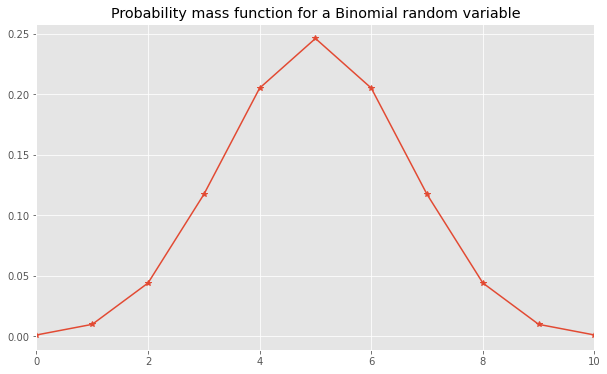

In [25]:
f = lambda k: binom.pmf(k, n=n,p=p)

x = np.arange(n+1);
plt.plot(x, f(x),'*-')
plt.title("Probability mass function for a Binomial random variable")
plt.xlim([0,n])
plt.show()

Observe that the probability mass function looks very much like the histogram plot! (not a coincidence) 


## Concept check

**Question**: what is a discrete random variable? 

A *discrete random variable (r.v.)* is an abstraction of a coin. It can take on a *discrete* set of possible different values, each with a preassigned probability. We saw two examples of discrete random variables: Bernoulli and binomial.  A Bernoulli r.v. takes value $1$ with probability $p$ and $0$ with probability $1-p$. A binomial r.v. takes values $0,1,\ldots,n$, with a given probability. The probabilities are given by the probability mass function. This function looks just like the histogram for a sample of a large number of random variables. 

You can use the same descriptive statistics to describe a discrete random value (min, max, mean, variance, etc..).

**Question**: what is the random variable that describes a fair dice? the sum of two fair dice? 

## Normal (Gaussian) distribution 

Roughly speaking, normal random variables are described by a "bell curve".  The curve is centered at the mean, $\mu$, and has width given by the standard deviation, $\sigma$. 

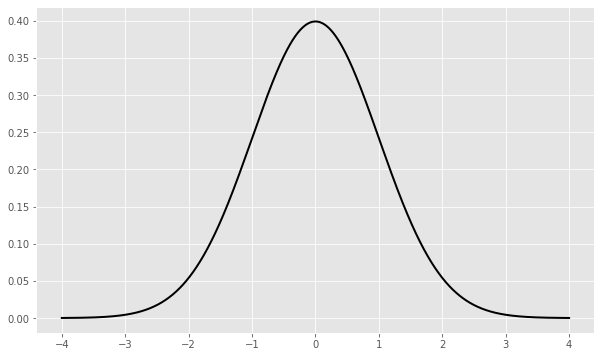

In [26]:
mu = 0 # mean
sigma = 1 # standard deviation 
x = np.arange(mu-4*sigma,mu+4*sigma,0.001);
pdf = norm.pdf(x,loc=mu, scale=sigma)
# Here, I could have also written
# pdf = 1/(sigma * sc.sqrt(2 * sc.pi)) * sc.exp( - (x - mu)**2 / (2 * sigma**2)) 
plt.plot(x, pdf, linewidth=2, color='k')
plt.show()

## Continuous random variables and probability density functions 

A normal random variable is an example of a *continuous* random variable. A normal random variable can take any real value, but some numbers are more likely than others. More formally, we say that the *probability density function (PDF)* for the normal (Gaussian) distribution is
$$
f(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}
e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} },
$$
where $\mu$ is the mean and $\sigma$ is the variance. What this means is that the probability that a normal random variable will take values in the interval $[a,b]$ is given by 
$$
\int_a^b f(x) dx.
$$
This is just the area under the curve for this interval. For $a=\mu-\sigma$ and $b = \mu+\sigma$, we plot this below.

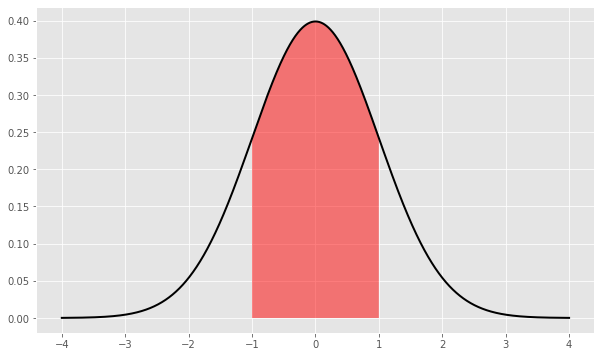

In [27]:
plt.plot(x, pdf, linewidth=2, color='k')
x2 = np.arange(mu-sigma,mu+sigma,0.001)
plt.fill_between(x2, y1= norm.pdf(x2,loc=mu, scale=sigma), facecolor='red', alpha=0.5)
plt.show()

One can check that 
$$
\int_{-\infty}^\infty f(x) dx = 1
$$
which just means that the probability that the random variable takes value between $-\infty$ and $\infty$ is one. 

This integral can be computed using the *cumulative distribution function* (CDF)
$$
F(x) = \int_{-\infty}^x f(t) dt = \text{Prob. random variable }\leq x .
$$
We have that 
$$
\int_a^b f(x) dx = F(b) - F(a)
$$


In [28]:
norm.cdf(mu+sigma, loc=mu, scale=sigma) - norm.cdf(mu-sigma, loc=mu, scale=sigma) 

0.6826894921370859

This means that 68% of the time, this normal random variable will have values between $\mu-\sigma$ and $\mu+\sigma$. 

You used to have to look these values up in a table! 

Let's see what it looks like if we sample 1,000,000 normal random variables and then plot a histogram. 

[ 0.12427539 -1.17146092  1.56576773  0.27789724  0.60100941  1.74726088
 -0.4250022   0.40747352 -0.822154    0.30603386  1.076894    1.61635607
 -0.35665344  1.01043231 -0.05758969 -0.46149593  0.21265672  0.80836776
 -0.7207094  -0.2067475   1.32100126 -0.71465846  0.07350694  0.47149857
  0.38304712  0.13967683  1.74586808 -0.37431761  0.86324955  0.32995944
  0.754919   -0.22623312 -1.86293653  0.43145446 -0.22165622  0.61399874
 -0.84120762  0.35011243 -1.16552859  0.295863   -0.67948342  1.15376503
  2.16379166 -1.14760825  0.47791306 -0.87777887  1.12021041 -0.29917472
  0.08756615  0.46939472 -0.55035269  0.03763262  0.4486613   0.68321434
 -0.69425674  0.48030845  1.68680528 -0.44924884 -0.09792667 -0.01124273
 -1.0265635   1.25511116 -0.05359175 -0.23031747 -0.63753588  1.1629441
 -0.39857197  0.05416999  0.28182486  0.86929209  0.76792115 -0.55294803
  2.010776   -0.48709934  0.65959911  0.66940449  0.48674628 -0.63017998
 -0.51326948  0.52297126  0.82182702  0.27761274  0.

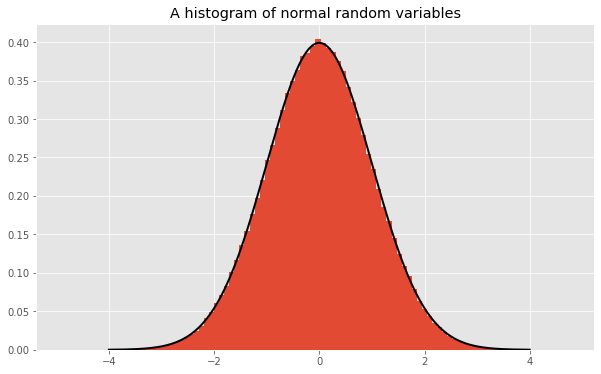

In [29]:
norm_vars = norm.rvs(loc=mu,scale=sigma,size=1000000)
print(norm_vars[:100])

plt.hist(norm_vars, bins=100,density=True)
plt.plot(x, pdf, linewidth=2, color='k')
plt.title("A histogram of normal random variables")
plt.show()

When $n$ is large, the histogram of the sampled variables looks just like the probability distribution function!

# Time permitting: explore categorical variables

Note: the descriptive statistics and discussed in this lecture can only be computed for quantitative variables. Similarly, histograms, pdf's, and cdf's only apply to quantitative variables

Recall the data frame we previsouly made from the 1994 census data:


In [30]:
#print(data)
print(data["marital"].value_counts(),"\n")
print(data["marital"].value_counts(normalize=True),"\n")
print(data["sex"].value_counts(normalize=True),"\n")
print(data["income"].value_counts(normalize=True),"\n")
data.groupby(['sex'])['income'].value_counts(normalize=True)

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital, dtype: int64 

 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: marital, dtype: float64 

 Male      0.669205
 Female    0.330795
Name: sex, dtype: float64 

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64 



sex      income
 Female   <=50K    0.890539
          >50K     0.109461
 Male     <=50K    0.694263
          >50K     0.305737
Name: income, dtype: float64

# Concept recap
- variable types 
- descriptive statistics in python (min, max, mean, median, std, var, histograms, quantiles) 
- correlation vs causation
- confounding variables 
- descriptive vs. inferential statistics
- discrete and continuous random variables (e.g.: Bernouilli, Binomial, Normal)
